In [1]:
from nilearn import plotting
from nilearn import datasets
from nilearn import surface

In [1]:
# Retrieve destrieux parcellation in fsaverage5 space from nilearn
destrieux_atlas = datasets.fetch_atlas_surf_destrieux()

# The parcellation is already loaded into memory
parcellation = destrieux_atlas['map_left']

# Retrieve fsaverage5 surface dataset for the plotting background. It contains
# the surface template as pial and inflated version and a sulcal depth maps
# which is used for shading
fsaverage = datasets.fetch_surf_fsaverage()

# The fsaverage dataset contains file names pointing to the file locations
print('Fsaverage5 pial surface of left hemisphere is at: %s' %
      fsaverage['pial_left'])
print('Fsaverage5 inflated surface of left hemisphere is at: %s' %
      fsaverage['infl_left'])
print('Fsaverage5 sulcal depth map of left hemisphere is at: %s' %
      fsaverage['sulc_left'])


Dataset created in /Users/dschonhaut/nilearn_data/destrieux_surface



 ...done. (2 seconds, 0 min)


Fsaverage5 pial surface of left hemisphere is at: /Users/dschonhaut/mambaforge/envs/nipy310/lib/python3.10/site-packages/nilearn/datasets/data/fsaverage5/pial_left.gii.gz
Fsaverage5 inflated surface of left hemisphere is at: /Users/dschonhaut/mambaforge/envs/nipy310/lib/python3.10/site-packages/nilearn/datasets/data/fsaverage5/infl_left.gii.gz
Fsaverage5 sulcal depth map of left hemisphere is at: /Users/dschonhaut/mambaforge/envs/nipy310/lib/python3.10/site-packages/nilearn/datasets/data/fsaverage5/sulc_left.gii.gz


 ...done. (1 seconds, 0 min)


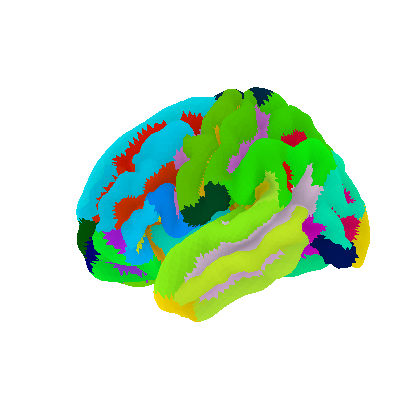

In [3]:
# Display Destrieux parcellation on fsaverage5 pial surface using nilearn
_ = plotting.plot_surf_roi(fsaverage['pial_left'], roi_map=parcellation,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.5)

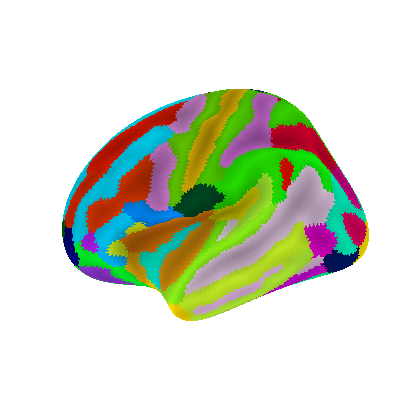

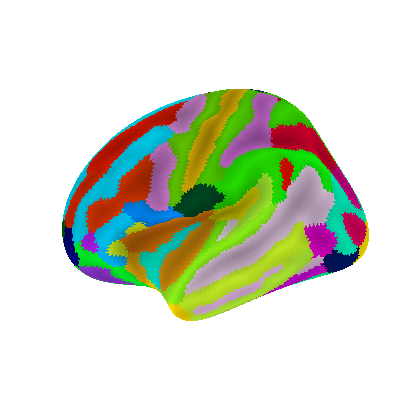

In [4]:
plotting.plot_surf_roi(fsaverage['infl_left'], roi_map=parcellation,
                       hemi='left', view='lateral',
                       bg_map=fsaverage['sulc_left'], bg_on_data=True,
                       darkness=.5)

In [1]:
import os
import numpy as np
import nibabel as nib
from surfer import Brain
%gui qt

print(__doc__)

subject_id = "fsaverage"
hemi = "lh"
surf = "inflated"

"""
Bring up the visualization.
"""
brain = Brain(subject_id, hemi, surf, background="white")

"""
Read in the automatic parcellation of sulci and gyri.
"""
aparc_file = os.path.join(os.environ["SUBJECTS_DIR"],
                          subject_id, "label",
                          hemi + ".aparc.a2009s.annot")
labels, ctab, names = nib.freesurfer.read_annot(aparc_file)

"""
Make a random vector of scalar data corresponding to a value for each region in
the parcellation.

"""
rs = np.random.RandomState(4)
roi_data = rs.uniform(.5, .8, size=len(names))

"""
Make a vector containing the data point at each vertex.
"""
vtx_data = roi_data[labels]

"""
Handle vertices that are not defined in the annotation.
"""
vtx_data[labels == -1] = -1

"""
Display these values on the brain. Use a sequential colormap (assuming
these data move from low to high values), and add an alpha channel so the
underlying anatomy is visible.
"""
brain.add_data(vtx_data, .5, .75, thresh=0, colormap="rocket", alpha=.8)

Automatically created module for IPython interactive environment


ValueError: The subjects directory has to be specified using the subjects_dir parameter or the SUBJECTS_DIR environment variable.